In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torchvision
import torch
from torch import nn
import torch.nn.functional as F
import cv2
import archs
import dataset
import data_augmentation
import skimage.feature
import skimage.filters
import skimage.exposure

In [41]:
a_0 = np.load('inputs/image_train_color_0915/img_002be4f.npy')
a_1 = np.load('inputs/image_train_color_0915/img_0011165.npy')

In [12]:
b_0 = np.load('inputs/mask_train_color_0915/msk_002be4f.npy')
b_1 = np.load('inputs/mask_train_color_0915/msk_0011165.npy')
b_0.shape

(4, 525, 325)

In [42]:
a_0 = a_0/255
a_1 = a_1/255

In [43]:
resize = data_augmentation.Resize()
a_0 = a_0.transpose(2, 0, 1)
a_0 = resize(a_0)
a_0 = a_0.transpose(1, 2, 0)

a_1 = a_1.transpose(2, 0, 1)
a_1 = resize(a_1)
a_1 = a_1.transpose(1, 2, 0)

In [14]:
b_0 = resize(b_0)
b_0 = b_0.transpose(1, 2, 0)

b_1 = resize(b_1)
b_1 = b_1.transpose(1, 2, 0)
b_0.shape

(256, 256, 4)

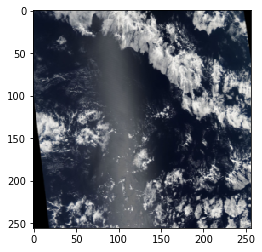

In [44]:
plt.imshow(a_0)

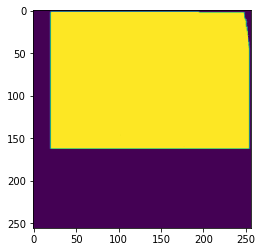

In [18]:
plt.imshow(b_0[:, :, 0])

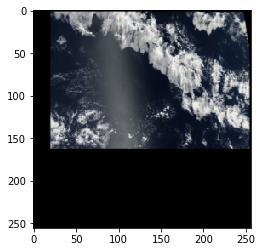

In [46]:
plt.imshow(np.stack([b_0[:,:,0],b_0[:,:,0],b_0[:,:,0]]).transpose(1,2,0) * a_0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


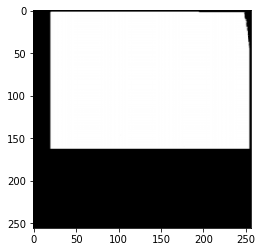

In [37]:
plt.imshow(np.stack([b_0[:,:,0],b_0[:,:,0],b_0[:,:,0]]).transpose(1,2,0))

In [72]:
left = np.where(b_0[:,:,0].mean(axis=1)>0.2)[0][0]
right = np.where(b_0[:,:,0].mean(axis=1)>0.2)[0][-1]
top = np.where(b_0[:,:,0].mean(axis=0)>0.2)[0][0]
bottom = np.where(b_0[:,:,0].mean(axis=0)>0.2)[0][-1]

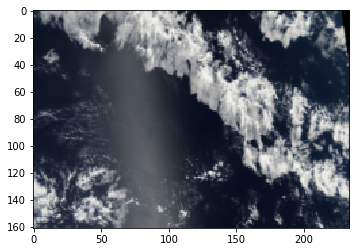

In [73]:
plt.imshow(a_0[left:right, top:bottom, :])

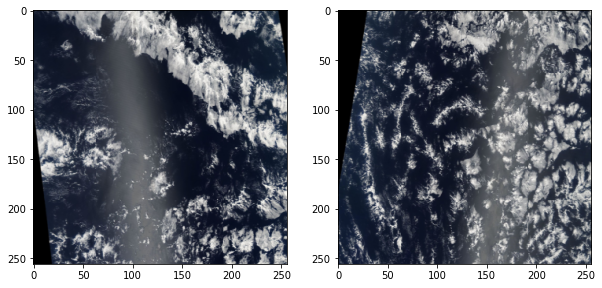

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(a_0)
plt.subplot(1,2,2)
plt.imshow(a_1)
plt.show()

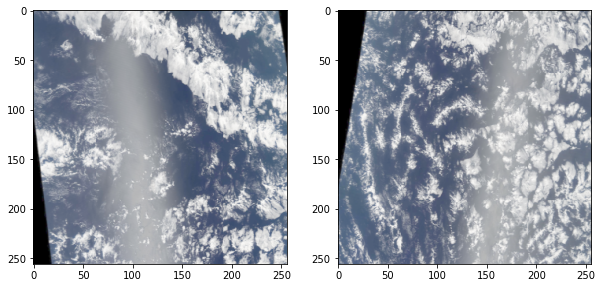

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(skimage.exposure.adjust_gamma(a_0, gamma=0.4))
plt.subplot(1,2,2)
plt.imshow(skimage.exposure.adjust_gamma(a_1, gamma=0.4))
plt.show()

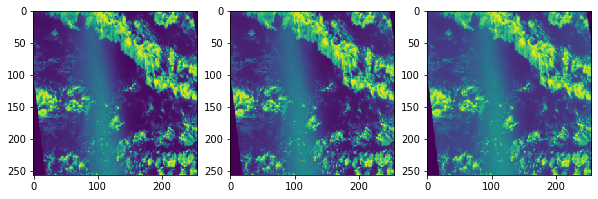

In [58]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(a_0[:, :, 0])
plt.subplot(1,3,2)
plt.imshow(a_0[:, :, 1])
plt.subplot(1,3,3)
plt.imshow(a_0[:, :, 2])
plt.show()

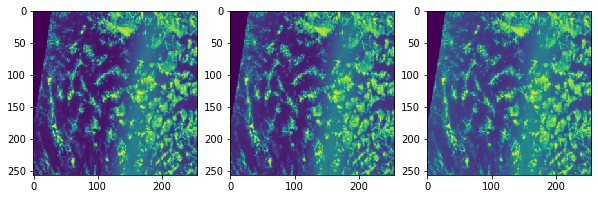

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(a_1[:, :, 0])
plt.subplot(1,3,2)
plt.imshow(a_1[:, :, 1])
plt.subplot(1,3,3)
plt.imshow(a_1[:, :, 2])
plt.show()

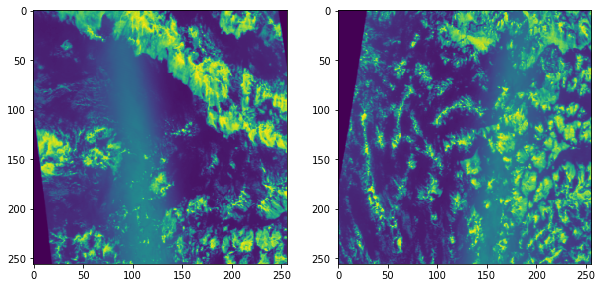

In [49]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(skimage.color.rgb2gray(a_0))
plt.subplot(1,2,2)
plt.imshow(skimage.color.rgb2gray(a_1))
plt.show()

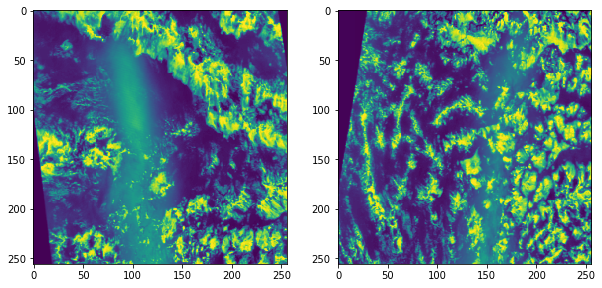

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
adapt_hist_a_0 = skimage.exposure.equalize_adapthist(skimage.color.rgb2gray(a_0))
plt.imshow(adapt_hist_a_0)
plt.subplot(1,2,2)
adapt_hist_a_1 = skimage.exposure.equalize_adapthist(skimage.color.rgb2gray(a_1))
plt.imshow(adapt_hist_a_1)
plt.show()

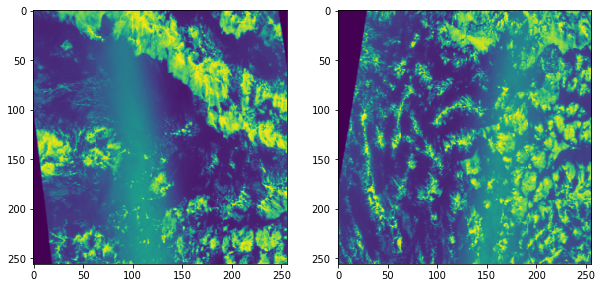

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
adjust_loss_a_0 = skimage.exposure.adjust_log(skimage.color.rgb2gray(a_0))
plt.imshow(adjust_loss_a_0)
plt.subplot(1,2,2)
adjust_loss_a_1 = skimage.exposure.adjust_log(skimage.color.rgb2gray(a_1))
plt.imshow(adjust_loss_a_1)
plt.show()

In [99]:
def trans_dog(image, sigma_1, sigma2):
    gausian_0 = skimage.filters.gaussian(skimage.color.rgb2gray(image), sigma=sigma_1)
    gausian_1 = skimage.filters.gaussian(skimage.color.rgb2gray(image), sigma=sigma2)
    dog = gausian_0-gausian_1
    dog = dog/dog.max()
    return dog

In [156]:
def load_ben_color(image, sigmaX=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

In [158]:
a_0

array([[[0.20313618, 0.22138627, 0.26557008],
        [0.13569786, 0.15506189, 0.20858168],
        [0.19611952, 0.22496655, 0.27337834],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.20958645, 0.23631951, 0.28467157],
        [0.11190679, 0.13785267, 0.19807423],
        [0.13845343, 0.16742793, 0.22391143],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.10650024, 0.14002421, 0.19447877],
        [0.10971672, 0.14018867, 0.20670382],
        [0.10277034, 0.1322037 , 0.19679436],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [157]:
load_ben_color(a_0)

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


C:\Users\shuns\Anaconda3\envs\kaggle\lib\site-packages\skimage\filters\_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


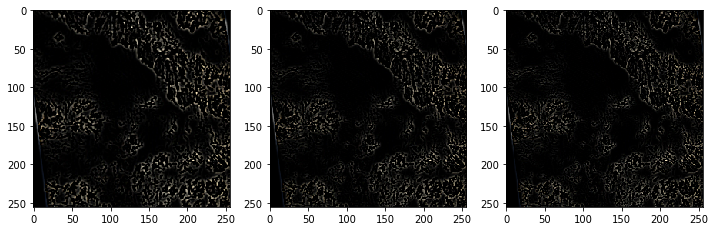

In [154]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(trans_dog(a_0, 1, 0.8))
plt.subplot(1,3,2)
plt.imshow(trans_dog(a_0, 1, 0.5))
plt.subplot(1,3,3)
plt.imshow(trans_dog(a_0, 1, 0.2))
plt.show()

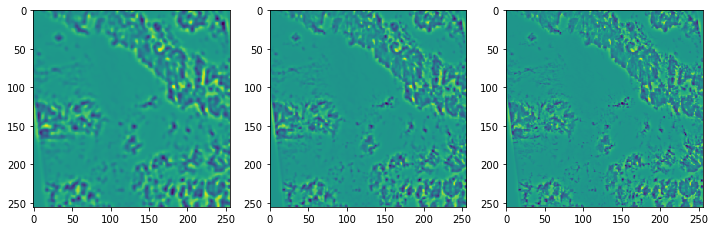

In [123]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(trans_dog(a_0, 3, 2))
plt.subplot(1,3,2)
plt.imshow(trans_dog(a_0, 3, 1))
plt.subplot(1,3,3)
plt.imshow(trans_dog(a_0, 3, 0.5))
plt.show()

C:\Users\shuns\Anaconda3\envs\kaggle\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


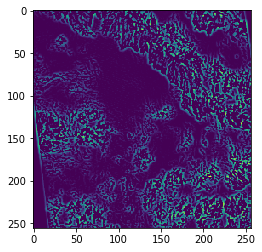

In [121]:
dog_ = trans_dog(a_0, 1, 0.5)
plt.imshow(skimage.exposure.equalize_adapthist(np.where(dog_ > 0, dog_, 0)))

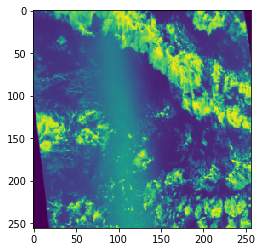

In [131]:
plt.imshow(skimage.exposure.adjust_gamma(skimage.color.rgb2gray(a_0), gamma=0.8))

In [143]:
a_0_0 = skimage.exposure.equalize_adapthist(skimage.exposure.adjust_log(skimage.color.rgb2gray(a_0)))
a_0_1 = skimage.exposure.equalize_adapthist(np.where(dog_ > 0, dog_, 0))
a_0_2 = skimage.exposure.equalize_adapthist(skimage.exposure.adjust_gamma(skimage.color.rgb2gray(a_0), gamma=0.8))

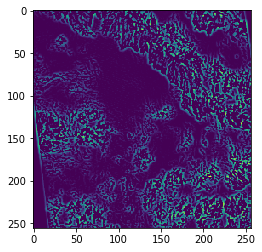

In [152]:
plt.imshow(a_0_1)

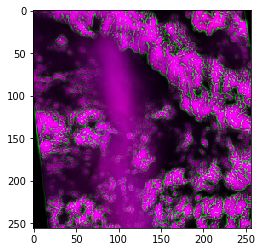

In [144]:
plt.imshow(np.stack([a_0_0, a_0_1, a_0_2]).transpose(1,2,0))

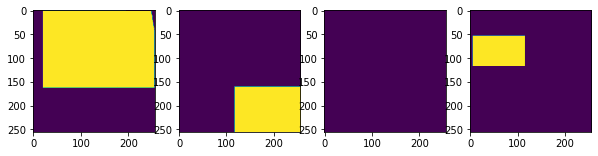

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(b_0[:, :, 0])
plt.subplot(1,4,2)
plt.imshow(b_0[:, :, 1])
plt.subplot(1,4,3)
plt.imshow(b_0[:, :, 2])
plt.subplot(1,4,4)
plt.imshow(b_0[:, :, 3])
plt.show()

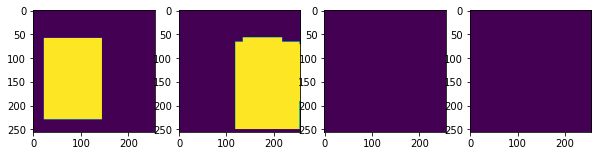

In [81]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(b_1[:, :, 0])
plt.subplot(1,4,2)
plt.imshow(b_1[:, :, 1])
plt.subplot(1,4,3)
plt.imshow(b_1[:, :, 2])
plt.subplot(1,4,4)
plt.imshow(b_1[:, :, 3])
plt.show()

In [3]:
model = archs.ResNet18WithUNet(4)
vgg = archs.VGGBlock(in_channels=3, middle_channels=64, out_channels=64)
pool = nn.MaxPool2d(2, 2)

In [4]:
a_0 = torch.Tensor(a_0[0:256, 0:256])
a_1 = torch.Tensor(a_0[0:256, 0:256])
a_0_0 = a_0.view(1, 3, a_0.shape[0], a_0.shape[1])
a_1_0 = a_1.view(1, 3, a_1.shape[0], a_1.shape[1])

In [10]:
a_0.shape

torch.Size([256, 256, 3])

In [3]:
a_0 = a_0[0:256, 0:256].transpose(2,0,1)

In [4]:
a_0.shape

(3, 256, 256)

In [104]:
random_crop = data_augmentation.RandomCrop()
random_crop(a_0).shape

(3, 256, 256)

In [167]:
horizon = data_augmentation.Horizontal_flip()
horizon(a_0).shape

(3, 256, 256)

In [233]:
vertical = data_augmentation.Vertical_flip()
vertical(a_0).shape

(3, 256, 256)

In [3]:
random_crop = dataset.RandomCrop()
random_crop(b_0).shape

(4, 256, 256)

In [10]:
torch.Tensor(b_0)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [ ]:
batch = torch.cat([a_0, a_1])

In [ ]:
batch.shape

In [ ]:
vgg(batch).shape

In [ ]:
convrelu(batch).shape

In [ ]:
pool(vgg(batch)).shape

In [ ]:
vgg(pool(batch)).shape

In [ ]:
model_1 = nn.Sequential(
nn.Conv2d(in_channels=3, out_channels = 64, kernel_size=2, stride=2))

In [ ]:
batch.shape

In [ ]:
model_1(batch).shape

In [ ]:
model(batch).shape